Our objective is to obtain a relation between the Sale Price of the houses in Ames, Iowa and the variables given in our dataset such that we may be able to predict the house prices of any other house based on the dataset.

**Our Code consists of these parts:**
<br><br>
**1. Importing packages and the datasets** <br>
**2. Data visualisation**<br>
**3. Data Analysis**<br>
**4. Handling missing values**<br>
**5. Feature Engineering**<br>
**6. Pre-processing the data**<br>
**7. Creating models**<br>
**8. Stacking**<br>
**9. Scores based on RMSE values**<br>
**10. Blending our models**<br>
**11. Ensembling with outputs of better performing models**

## 1. Importing packages and the datasets

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

We start off by importing the basic data preprocessing, analysis and visualisation packages.<br><br>
Next we read the training & test set files. 

In [2]:
train=pd.read_csv("https://raw.githubusercontent.com/AnujPR/Kaggle-Hybrid-House-Prices-Prediction/master/Housing_Prices_train.csv")
test=pd.read_csv("https://raw.githubusercontent.com/AnujPR/Kaggle-Hybrid-House-Prices-Prediction/master/Housing_Prices_test.csv")
train.shape, test.shape

((1460, 81), (1459, 80))

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


The Id column is unnecessary as it is just the serial number of every data entry and will have no relation with the sale price whatsoever.<br><br>So we drop it from our dataset.

In [4]:
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)
train.shape, test.shape

((1460, 80), (1459, 79))

In [5]:
train.describe().T #transposes the actual describe

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


## 2. Data visualisation
## 3. Data Analysis 

These will be performed simultaneously as plots will give us insights to the importance and distribution of features with respect to the __SalePrice__ target variable

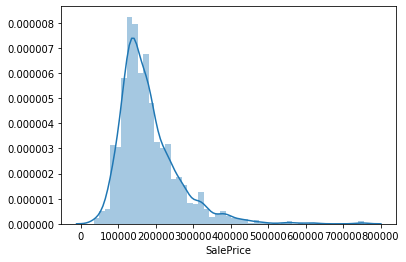

In [6]:
sns.distplot(train['SalePrice']);

This function gave us the distribution of our sale price values.<br><br>As you can see; the histogram is skewed to the right.<br><br>
Therefore, we need to do something to normalise the data distribution because most of the machine learning models work best on normally distributed data.

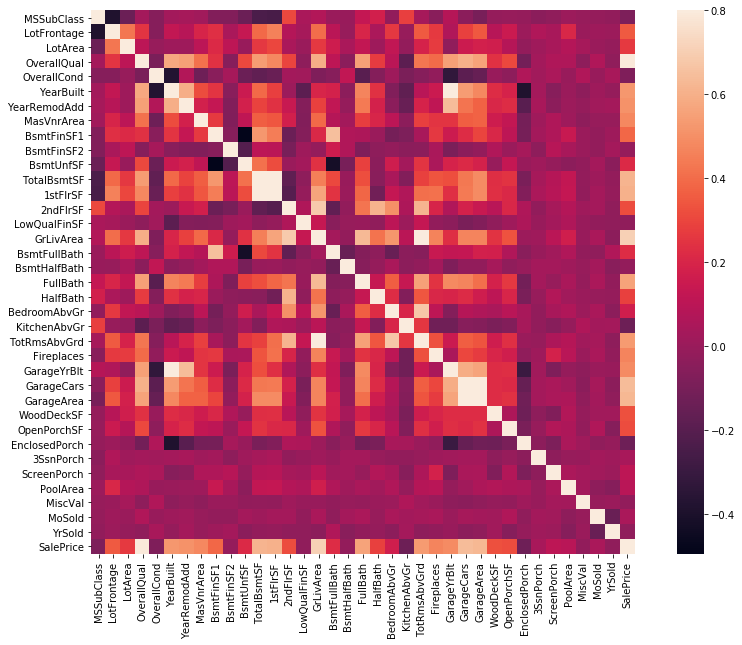

In [7]:
#correlation matrix

corrmat = train.corr()
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corrmat, vmax=.8, square=True);

We generated a heatmap to tell us about the correlation between different variables.

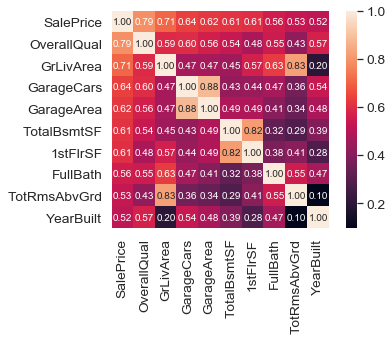

In [8]:
#saleprice correlation matrix
#k = 10 #number of variables for heatmap

cols = corrmat.nlargest(10, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

The above graph tells us about the variables with the 10 highest values of correlation with SalePrice values 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


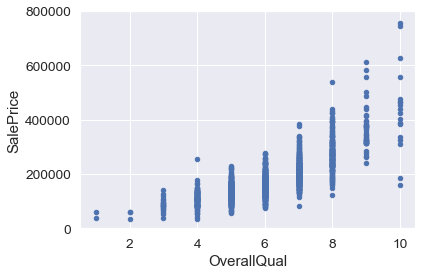

In [9]:
#Graph for SalePrice v/s OverallQual

var = 'OverallQual'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


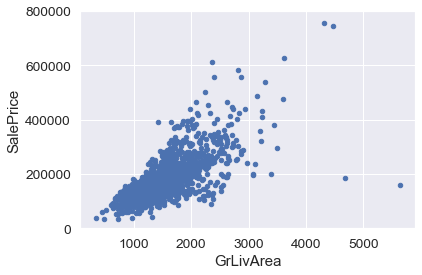

In [10]:
#Graph for SalePrice v/s GrLivArea

var = 'GrLivArea'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


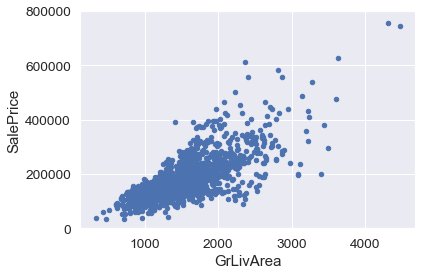

In [11]:
#Deleting outliers
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

#Graph for SalePrice v/s GrLivArea after deleting outliers

var = 'GrLivArea'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


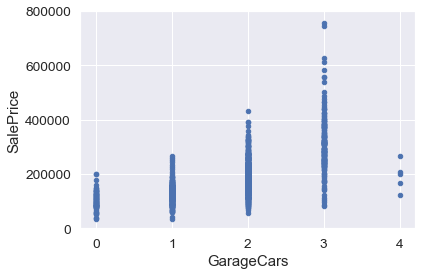

In [12]:
#Graph for SalePrice v/s GarageCars

var = 'GarageCars'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


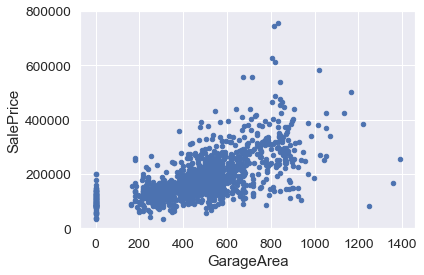

In [13]:
#Graph for SalePrice v/s GarageArea

var = 'GarageArea'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


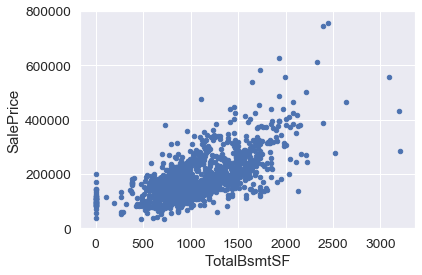

In [14]:
#Graph for SalePrice v/s TotalBsmtSF

var = 'TotalBsmtSF'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


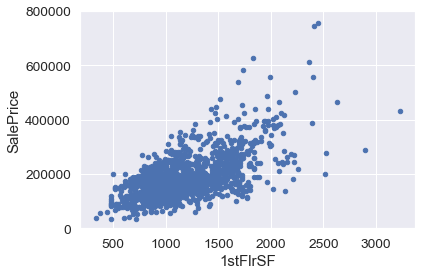

In [15]:
#Graph for SalePrice v/s 1stFlrSF

var = '1stFlrSF'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


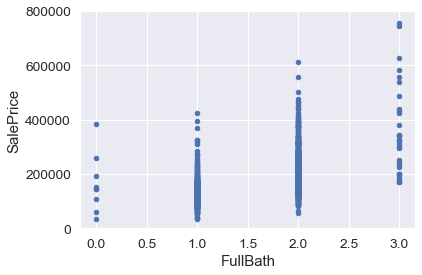

In [16]:
#Graph for SalePrice v/s FullBath

var = 'FullBath'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


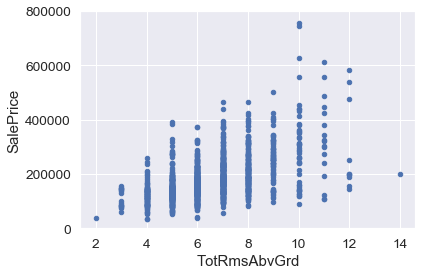

In [17]:
#Graph for SalePrice v/s TotRmsAbvGrd

var = 'TotRmsAbvGrd'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

We generated scatter plots of the Sale Price v/s the 9 variables with highest correlation values with it.

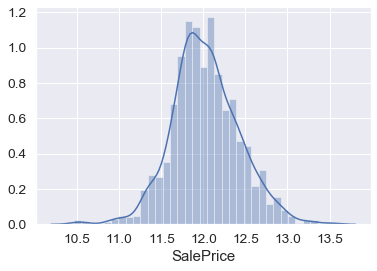

In [18]:
train["SalePrice"] = np.log1p(train["SalePrice"])
y = train['SalePrice'].reset_index(drop=True)

sns.distplot(train['SalePrice']);

In many cases, taking the log greatly reduces the variation of a variable making estimates less prone to outlier influence.
That justifies a logarithmic transformation. Taking the log of saleprice as new SalePrice values removes to a great extent the skewness of the SalePrice distribution. Now we have a somewhat normally distributed histogram.

In [19]:
train.shape, test.shape

((1458, 80), (1459, 79))

Combining the training and testing sets allows us to clean and pre-process the data together and hence, efficiently.

In [20]:
combine = pd.concat((train, test)).reset_index(drop=True)
combine.drop(['SalePrice'], axis=1, inplace=True)
print("Size of combined data set is : {}".format(combine.shape))

Size of combined data set is : (2917, 79)


In [21]:
combine.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2917.000000,2431.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2894.000000,2916.000000,2916.000000,...,2916.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000,2917.000000
mean,57.135756,69.180584,10139.439150,6.086390,5.564964,1971.287967,1984.248200,101.733587,439.015432,49.616255,...,472.409465,93.629414,47.280082,23.114158,2.604045,16.073363,2.088790,50.860816,6.213576,2007.792938
std,42.532140,22.791719,7807.036512,1.406704,1.113414,30.286991,20.892257,178.510291,444.182329,169.258662,...,214.620878,126.532643,67.118965,64.263424,25.196714,56.202054,34.561371,567.595198,2.713070,1.315328
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7476.000000,5.000000,5.000000,1953.000000,1965.000000,0.000000,0.000000,0.000000,...,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,68.000000,9452.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.000000,0.000000,...,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11556.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,...,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,4010.000000,1526.000000,...,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


## 4. Handling missing values

Having observed the datasets we know that there are a number of missing data entries for every house in them.<br><br>Handling them may be important because they might cause problems in our model. [Read about it here](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3668100/)<br><br>We defined the __miss_perc__ function to tell us about which variables have missing data and quantises it.

In [22]:
def miss_perc(df):
  df_null_data = (df.isnull().sum() / len(combine)) * 100
  df_null_data = df_null_data.drop(df_null_data[df_null_data == 0].index).sort_values(ascending=False)[:30]
  return pd.DataFrame({'Missing Percentage' :df_null_data})

miss_perc(combine)

,Missing Percentage
PoolQC,99.691464
MiscFeature,96.400411
Alley,93.212204
Fence,80.425094
FireplaceQu,48.680151
LotFrontage,16.660953
GarageFinish,5.450806
GarageYrBlt,5.450806
GarageQual,5.450806
GarageCond,5.450806


These features are categorical in nature and the model may mistakenly consider them as numerical features. Thence, we establish them as type __String__

In [23]:
combine['MSSubClass'] = combine['MSSubClass'].apply(str)
combine['YrSold'] = combine['YrSold'].astype(str)
combine['MoSold'] = combine['MoSold'].astype(str)

Now we will fill our missing data entries with values most suitable for their type.

First, we fill the numerical features with the value 0, because given the data description and upon some thinking, it is likely that these values are missing because the feature they are associated to is not a feature of the house.<br><br>
Second, these are the categorical features, which need to have an object type data type such as string and similarly from observation, we place in the missing entries the value 'None'<br><br>
Third, there are very few empty values in these remaining columns, so we will us the mode to fill them out.

The __LotFrontage__ was filled with the median of the values of LotFrontage of houses of every __Neighborhood__.<br><br>
The __MSZoning__ was filled with the median of the values of MSZoning of their respective __MSSubClass__.

In [24]:
for col in ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 
            'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath',
            'GarageYrBlt', 'GarageArea','GarageCars',
            'MasVnrArea']:
    combine[col] = combine[col].fillna(0)

for col in ['BsmtQual', 'BsmtCond', 'BsmtExposure', 
            'BsmtFinType1', 'BsmtFinType2','Fence',
            'PoolQC','MiscFeature','Alley','FireplaceQu',
            'Fence','GarageType', 'GarageFinish', 
            'GarageQual', 'GarageCond']:
    combine[col] = combine[col].fillna("None")

for col in ['Utilities','Exterior1st','Exterior2nd',
            'SaleType', 'Functional','Electrical',
            'KitchenQual', 'GarageFinish', 'GarageQual', 
            'GarageCond','MasVnrType']:
    combine[col] = combine[col].fillna(combine[col].mode()[0])

combine['LotFrontage'] = combine.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

combine['MSZoning'] = combine.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

miss_perc(combine)

,Missing Percentage


Now when we called __miss_perc__, we saw that all the missing values had been handled.

The next code cells groups together the categorical and numerical features. 

In [25]:
categorical_features = combine.dtypes[combine.dtypes == "object"].index

#combine.update(combine[categorical_features].fillna("None")

categorical_features

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [26]:
numerical_features = combine.dtypes[combine.dtypes != "object"].index

#combine.update(combine[numerical_features].fillna(0))

numerical_features

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'],
      dtype='object')

We encode the categorical features in the next step, this will cause the number of columns in our dataset to increase.

In [27]:
miss_perc(combine)

,Missing Percentage


## 5. Feature Engineering

Importing packages to help with transformation of the features as more of them may be skewed.

In [28]:
from scipy import stats
from scipy.stats import norm, skew, boxcox_normmax # for statistics
from scipy.special import boxcox1p

Grouping the features with skewness together

In [29]:
skewed_features = combine[numerical_features].apply(lambda x: skew(x)).sort_values(ascending=False)
skewed_features

MiscVal          21.939672
PoolArea         17.688664
LotArea          13.109495
LowQualFinSF     12.084539
3SsnPorch        11.372080
KitchenAbvGr      4.300550
BsmtFinSF2        4.144503
EnclosedPorch     4.002344
ScreenPorch       3.945101
BsmtHalfBath      3.929996
MasVnrArea        2.621719
OpenPorchSF       2.529358
WoodDeckSF        1.844792
1stFlrSF          1.257286
LotFrontage       1.103039
GrLivArea         1.068750
BsmtFinSF1        0.980645
BsmtUnfSF         0.919688
2ndFlrSF          0.861556
TotRmsAbvGrd      0.749232
Fireplaces        0.725278
HalfBath          0.696666
TotalBsmtSF       0.671751
BsmtFullBath      0.622415
OverallCond       0.569314
BedroomAbvGr      0.326568
GarageArea        0.216857
OverallQual       0.189591
FullBath          0.165514
GarageCars       -0.219297
YearRemodAdd     -0.450134
YearBuilt        -0.599194
GarageYrBlt      -3.904632
dtype: float64

Box-Cox transformation is used here, to make the features with high skewness normally distributed. <br><br>Box Cox is useful for highly skewed non-positive data. See [here](https://stats.stackexchange.com/questions/339589/box-cox-log-or-arcsine-transformation) or [here](https://stats.stackexchange.com/a/1452) for more explanation.

In [30]:
high_skew_feat = skewed_features[abs(skewed_features) > 0.5]
skewed_features = high_skew_feat.index

for feature in skewed_features:
  combine[feature] = boxcox1p(combine[feature], boxcox_normmax(combine[feature] + 1))

__Utilities, Street and PoolQC__ are observed to be uninfluential to the SalePrice.<br><br>
We have created new features here, by the name of __TotalSF__ etc. which are self explanatory.

In [31]:
combine = combine.drop(['Utilities', 'Street', 'PoolQC'], axis=1)

combine['TotalSF'] = combine['TotalBsmtSF'] + combine['1stFlrSF'] + combine['2ndFlrSF']

combine['YrBltAndRemod'] = combine['YearBuilt']+ combine['YearRemodAdd']

combine['Total_sqr_footage'] = (combine['BsmtFinSF1'] + combine['BsmtFinSF2'] + combine['1stFlrSF'] + combine['2ndFlrSF'])

combine['Total_Bathrooms'] = (combine['FullBath'] + (0.5 * combine['HalfBath']) + combine['BsmtFullBath'] + (0.5 * combine['BsmtHalfBath']))

combine['Total_porch_sf'] = (combine['OpenPorchSF'] + combine['3SsnPorch'] + combine['EnclosedPorch'] + combine['ScreenPorch'] +
                             combine['WoodDeckSF'])

combine['haspool'] = combine['PoolArea'].apply(lambda x: 1 if x > 0 else 0)

combine['has2ndfloor'] = combine['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)

combine['hasgarage'] = combine['GarageArea'].apply(lambda x: 1 if x > 0 else 0)

combine['hasbsmt'] = combine['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)

combine['hasfireplace'] = combine['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [32]:
combine.shape

(2917, 86)

## 6. Pre-processing the data

Encoding the categorical features. These features have data entries which are text format, not understandable by the model.
This cell converts the different text categories in to numeric categories.<br><br>
The features below have more than two types of categories.They are not merely columns to store the data for presence or absence of a feature of a house.

In [33]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(combine[c].values)) 
    combine[c] = lbl.transform(list(combine[c].values))

Categorical features are converted into dummy/indicator variables by means of this function. At this point, get_dummies and LabelEncoder seem similar. Please check out this [link](https://stats.stackexchange.com/questions/369428/deciding-between-get-dummies-and-labelencoder-for-categorical-variables-in-a-lin) to get rid of confusion.

In [34]:
combine = pd.get_dummies(combine)
print(combine.shape)

(2917, 227)


Used for location using index of the data in the feature. <br><br>
X is the feature input file and X_sub is the 

In [35]:
X = combine.iloc[:len(y), :]
X_sub = combine.iloc[len(y):, :]

Dropping the outliers or may be not.<br> I've inserted this commented bit of code because there were a few notebooks that dismissed these entries due to them being outliers. Your choice.

In [36]:
#outliers = [30, 88, 462, 631, 1322]
#X = X.drop(X.index[outliers])
#y = y.drop(y.index[outliers])

Removing the features that overfit.

In [37]:
overfit = []
for i in X.columns:
    counts = X[i].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(X) * 100 > 99.94:
        overfit.append(i)

overfit = list(overfit)

X = X.drop(overfit, axis=1).copy()
X_sub = X_sub.drop(overfit, axis=1).copy()
overfit

[]

In [38]:
X.shape, y.shape, X_sub.shape

((1458, 227), (1458,), (1459, 227))

## 7. Creating models

Importing the necessary packages for defining the models we wish to use.

In [39]:
from datetime import datetime

from sklearn.linear_model import ElasticNetCV, Lasso, ElasticNet, LassoCV, RidgeCV, BayesianRidge, LassoLarsIC
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

from mlxtend.regressor import StackingCVRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone

import sklearn.linear_model as linear_model

#from sklearn.manifold import TSNE
#from sklearn.cluster import KMeans
#from sklearn.decomposition import PCA
#from sklearn.preprocessing import StandardScaler

#import xgboost as xgb
#import lightgbm as lgb

The Root Mean Squared Error is defined here to find the accuracy of our predictions. <br><br> KFold is a method of cross-validating the model ability on new data. See [here](https://machinelearningmastery.com/k-fold-cross-validation/)

In [40]:
kfolds = KFold(n_splits=10, shuffle=True, random_state=42)

def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model, X=X):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=kfolds))
    return (rmse)

These models are all different methods of regression. Please read the documnetation of each to understand the details and the choice of parameters. <br><br> The __RobustScaler()__ is used because we have not handled the outliers very well.<br><br>
We do not want the models to succumb to inaccuracy in prediction due to non-robustness of our model arising due to the presence of these outliers.<br><br>**make_pipeline** can be understood as an entity that allows for sequential assembly of multiple transforms on a dataset.<br<br>In our case we combine the robust scaler and estimator and cross validator module. 

In [41]:
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

In [42]:
ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=alphas_alt, cv=kfolds))
#KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

In [43]:
lasso = make_pipeline(RobustScaler(), LassoCV(max_iter=1e7, alphas=alphas2, random_state=42, cv=kfolds))
#lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [44]:
ENet = make_pipeline(RobustScaler(), ElasticNetCV(max_iter=1e7, alphas=e_alphas, cv=kfolds, l1_ratio=e_l1ratio))      
#ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))                          

In [45]:
svr = make_pipeline(RobustScaler(), SVR(C= 20, epsilon= 0.008, gamma=0.0003,))

In [46]:
#GBoostR = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=4, max_features='sqrt', min_samples_leaf=15, min_samples_split=10, loss='huber', random_state =42)
#GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
#                                   max_depth=4, max_features='sqrt',
#                                   min_samples_leaf=15, min_samples_split=10, 
#                                   loss='huber', random_state =5)

In [47]:
XGBoostR = XGBRegressor(learning_rate=0.01,n_estimators=3460, max_depth=3, min_child_weight=0, gamma=0, subsample=0.7, colsample_bytree=0.7, 
                       objective ='reg:squarederror', nthread=-1, scale_pos_weight=1, seed=27, reg_alpha=0.00006, silent =True)

#model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, learning_rate=0.05, max_depth=3, min_child_weight=1.7817, n_estimators=2200,
#                             reg_alpha=0.4640, reg_lambda=0.8571, subsample=0.5213, silent=1, random_state =7, nthread = -1)

In [48]:
LightGBMR = LGBMRegressor(objective='regression', num_leaves=4, learning_rate=0.01, n_estimators=5000, max_bin=200, bagging_fraction=0.75,
                                       bagging_freq=5, bagging_seed=7, feature_fraction=0.2, feature_fraction_seed=7, verbose=-1, )

#model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5, learning_rate=0.05, n_estimators=720, max_bin = 55, bagging_fraction = 0.8, 
#                              bagging_freq = 5, feature_fraction = 0.2319, feature_fraction_seed=9, bagging_seed=9, min_data_in_leaf =6, 
#                              min_sum_hessian_in_leaf = 11)

## 8. Stacking 
## and
## 9. Scores based on RMSE values

In [49]:
#StackCVR_gen = StackingCVRegressor(regressors=(ridge, lasso, ENet, GBoostR, XGBoostR, LightGBMR), 
 #                               meta_regressor=XGBoostR, use_features_in_secondary=True)

StackCVR_gen = StackingCVRegressor(regressors=(ridge, lasso, ENet, XGBoostR, LightGBMR), 
                                meta_regressor=XGBoostR, use_features_in_secondary=True)

In [50]:
# Using various prediction models that we just created 

score = cv_rmse(ridge , X)
print("Ridge: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

Ridge: 0.1092 (0.0156)
 2020-04-19 18:25:18.236511


In [51]:
score = cv_rmse(lasso , X)
print("LASSO: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

LASSO: 0.1081 (0.0153)
 2020-04-19 18:25:23.426023


In [52]:
score = cv_rmse(ENet)
print("elastic net: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

elastic net: 0.1081 (0.0153)
 2020-04-19 18:25:46.346083


In [53]:
score = cv_rmse(svr)
print("SVR: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

SVR: 0.1090 (0.0159)
 2020-04-19 18:25:53.734093


In [54]:
score = cv_rmse(XGBoostR)
print("xgboost: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

xgboost: 0.1121 (0.0162)
 2020-04-19 18:29:26.426553


In [55]:
score = cv_rmse(LightGBMR)
print("lightgbm: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

lightgbm: 0.1133 (0.0156)
 2020-04-19 18:29:45.860854


In [56]:
#score = cv_rmse(GBoostR)
#print("gbr: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

In [57]:
print('START Fit')

START Fit


In [58]:
print('stack_gen')
stack_gen_model = StackCVR_gen.fit(np.array(X), np.array(y))

stack_gen


In [59]:
print('elasticnet')
elastic_model_full_data = ENet.fit(X, y)

elasticnet


In [62]:
print('Lasso')
lasso_model_full_data = lasso.fit(X, y)

Lasso


In [63]:
print('Ridge')
ridge_model_full_data = ridge.fit(X, y)

Ridge


In [64]:
print('Svr')
svr_model_full_data = svr.fit(X, y)

Svr


In [65]:
print('xgboost')
xgb_model_full_data = XGBoostR.fit(X, y)

xgboost


In [66]:
print('lightgbm')
lgb_model_full_data = LightGBMR.fit(X, y)

lightgbm


## 10. Blending our models

In [67]:
def blend_models_predict(X):
    return ((0.1 * elastic_model_full_data.predict(X)) + \
            (0.05 * lasso_model_full_data.predict(X)) + \
            (0.1 * ridge_model_full_data.predict(X)) + \
            (0.1 * svr_model_full_data.predict(X)) + \
           # (0.1 * gbr_model_full_data.predict(X)) + \
            (0.2 * xgb_model_full_data.predict(X)) + \
            (0.1 * lgb_model_full_data.predict(X)) + \
            (0.35 * stack_gen_model.predict(np.array(X))))

In [68]:
print('RMSLE score on train data:')
print(rmsle(y, blend_models_predict(X)))

RMSLE score on train data:
0.06487422637676606


In [71]:
print('Predict submission')
submission = pd.read_csv("https://raw.githubusercontent.com/AnujPR/Kaggle-Hybrid-House-Prices-Prediction/master/sample_submission_kaggle.csv")
submission.iloc[:,1] = np.floor(np.expm1(blend_models_predict(X_sub)))

Predict submission


## 11. Ensembling with outputs of better performing models

In [72]:
print('Blend with Top Kernels submissions\n')
sub_1 = pd.read_csv('https://raw.githubusercontent.com/AnujPR/Kaggle-Hybrid-House-Prices-Prediction/master/masum_rumia-detailed-regression-guide-with-house-pricing%20submission.csv')
sub_2 = pd.read_csv('https://raw.githubusercontent.com/AnujPR/Kaggle-Hybrid-House-Prices-Prediction/master/serigne_stacked-regressions-top-4-on-leaderboard_submission.csv')
sub_3 = pd.read_csv('https://raw.githubusercontent.com/AnujPR/Kaggle-Hybrid-House-Prices-Prediction/master/jesucristo1-house-prices-solution-top-1_new_submission.csv')
submission.iloc[:,1] = np.floor((0.25 * np.floor(np.expm1(blend_models_predict(X_sub)))) + 
                                (0.25 * sub_1.iloc[:,1]) + 
                                (0.25 * sub_2.iloc[:,1]) + 
                                (0.25 * sub_3.iloc[:,1]))

Blend with Top Kernels submissions



In [73]:
q1 = submission['SalePrice'].quantile(0.0042)
q2 = submission['SalePrice'].quantile(0.99)
# Quantiles helping us get some extreme values for extremely low or high values 
submission['SalePrice'] = submission['SalePrice'].apply(lambda x: x if x > q1 else x*0.77)
submission['SalePrice'] = submission['SalePrice'].apply(lambda x: x if x < q2 else x*1.1)
submission.to_csv("submission.csv", index=False)

In [74]:
submission.head()

,Id,SalePrice
0,1461,121515.0
1,1462,161546.0
2,1463,185198.0
3,1464,197183.0
4,1465,190518.0
